In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv("data6717.csv")
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertiliser_Quantity,Pesticide_Quantity,Yield_tons_per_acre
0,Clay,Wheat,225.117079,19.191553,59488.380629,811.673690,1.728929
1,Sandy Loam,Wheat,315.951046,24.513009,95981.507082,574.246763,2.142011
2,Sandy Loam,Rice,444.892536,32.136555,89884.767017,657.781659,2.581379
3,Clay,Wheat,492.812499,19.984464,73514.309720,338.288175,1.515758
4,Chalky,Rice,426.559034,34.057319,107404.150948,406.520062,2.798321


In [3]:
#Encode Categorical Variables
label_encoder = {}
categorical_cols = ['Soil_Type','Crop','Fertiliser_Quantity','Pesticide_Quantity']
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoder[col] = encoder

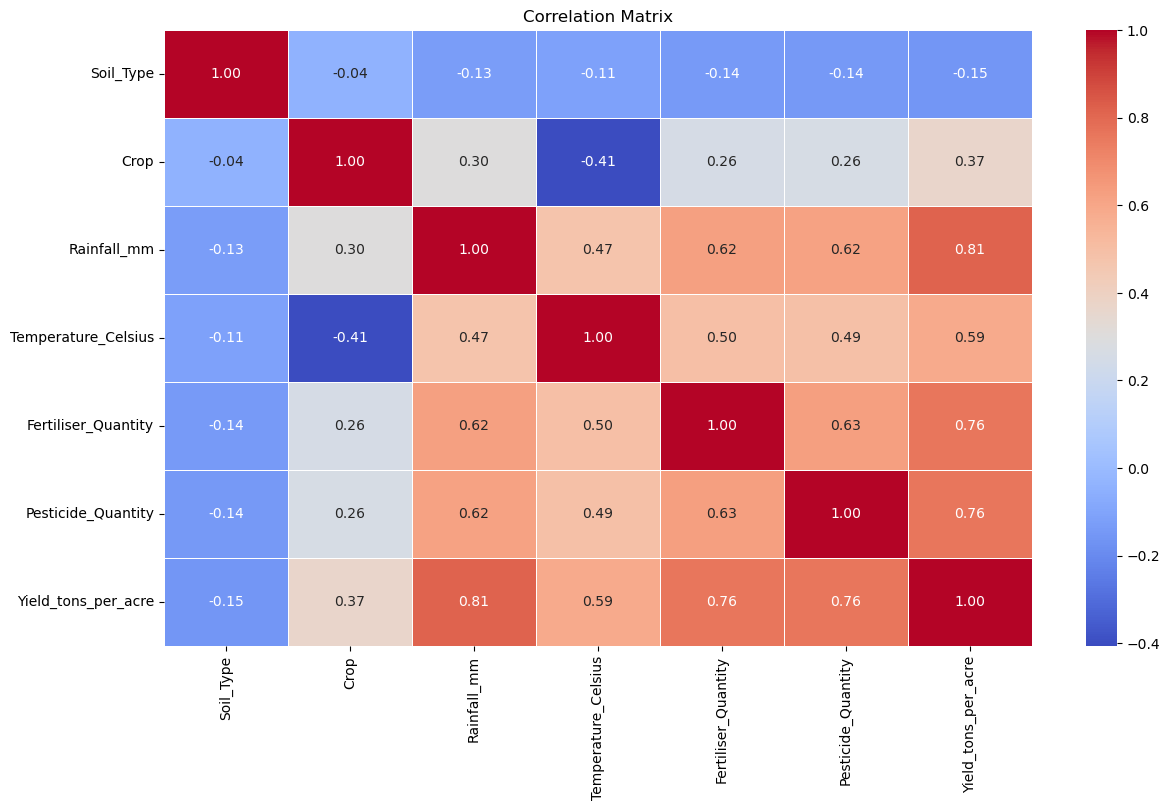

In [4]:
#Computing correlation matrix and visualizing heatmap
corr_matrix = df.corr()
plt.figure(figsize = (14,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

In [5]:
#Seperate Features and target variable
X = df.drop(columns = {'Yield_tons_per_acre'})
y = df['Yield_tons_per_acre']

In [6]:
#Splitting the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [7]:
#Standardizing Data
scaler = StandardScaler()

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [10]:
random_search = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

In [11]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [12]:
#Getting the Best Paramters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [13]:
model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20
)

In [14]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_split=10,
                      n_estimators=200)

In [15]:
y_pred = model.predict(X_test)

In [16]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [17]:
print(f"The Mean Absolute Error is : {mae:.2f}")
print(f"The Mean Squared Error is : {mse:.2f}")
print(f"The Root Mean Squared Error is : {rmse:.2f}")
print(f"The R2 Score is : {r2:.2f}")

The Mean Absolute Error is : 0.16
The Mean Squared Error is : 0.04
The Root Mean Squared Error is : 0.20
The R2 Score is : 0.94


In [18]:
print("Train R²:", r2_score(y_train, model.predict(X_train)))
print("Test R²:", r2_score(y_test, model.predict(X_test)))

Train R²: 0.970137586880033
Test R²: 0.9407084578528607


In [19]:
import pickle

In [20]:
with open("model1.pkl", "wb") as file:
    pickle.dump({"model": model, "encoder": label_encoder,"scaler":scaler}, file)

In [21]:
importances = model.feature_importances_
feature_names = ["Soil_Type", "Crop", "Rainfall_mm", "Temperature_Celsius", "Fertiliser_Quantity", "Pesticide_Quantity"]
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Soil_Type: 0.0253
Crop: 0.3717
Rainfall_mm: 0.2164
Temperature_Celsius: 0.1422
Fertiliser_Quantity: 0.1409
Pesticide_Quantity: 0.1035
